Q1

The goal is to build a **binary classification model** that predicts whether a patient has **heart disease (1)** or not (0), using clinical data from the **UCI Heart Disease Dataset**. The dataset includes **303 patient records** with **13 features**, such as age, chest pain type, blood pressure, cholesterol levels, and ECG results. The original target variable `num` ranges from 0 to 4, indicating increasing severity of heart disease. For binary classification, it is transformed into `0` (no heart disease) and `1` (presence of heart disease) if `num` > 0.

This is a **supervised learning** problem with a mix of numerical and categorical variables. Challenges include **missing values**, **class imbalance**, and the need for **interpretable models** due to the medical context.

Accurate prediction can support **early diagnosis** and improve clinical decision-making.

Q2

In [56]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# Convert features and target to standard pandas DataFrames
X = heart_disease.data.features.copy()
y = heart_disease.data.targets.copy()

# Data types
print("\nData types:")
print(X.dtypes)


Data types:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
dtype: object


In [57]:
# 1. Continuous variables → float64 
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X[continuous_features] = X[continuous_features].astype(float)

# 2. Categorical/discrete variables → Int64 
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
X[categorical_features] = X[categorical_features].astype('Int64')

# Data types
print("\nData types:")
print(X.dtypes)


Data types:
age         float64
sex           Int64
cp            Int64
trestbps    float64
chol        float64
fbs           Int64
restecg       Int64
thalach     float64
exang         Int64
oldpeak     float64
slope         Int64
ca          float64
thal          Int64
dtype: object


In [58]:
# Define continuous numerical features 
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Display min and max for each
print(X[numerical_features].agg(['min', 'max']).transpose())

            min    max
age        29.0   77.0
trestbps   94.0  200.0
chol      126.0  564.0
thalach    71.0  202.0
oldpeak     0.0    6.2


In [59]:
from sklearn.preprocessing import StandardScaler

# List of numerical features to standardize (excluding 'ca')
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Initialize the scaler
scaler = StandardScaler()

# Apply standardization only to selected numerical features
X[numerical_features] = scaler.fit_transform(X[numerical_features])

Basic data transformations were applied to prepare the dataset for analysis:

- **Variable Type Identification**:  
  Based on the official UCI dataset documentation and domain knowledge:
  - **Continuous numerical variables**: `age`, `trestbps`, `chol`, `thalach`, and `oldpeak` were treated as numerical, since they are measured on ratio or interval scales with meaningful numeric ranges. The variable `ca` (number of major vessels colored by fluoroscopy) is inherently an integer-valued numerical feature. Since it is already in the correct format, no type conversion is applied.

  - **Categorical/discrete variables**: Variables such as `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, and `thal` are encoded as integers but represent discrete categories. This classification is supported by the original dataset description. For example, `cp` (chest pain type) ranges from 1 to 4 representing distinct medical conditions, and `thal` represents different thalassemia test results (3 = normal, 6 = fixed defect, 7 = reversible defect).

- **Missing Value Identification**:  
  The features `ca` and `thal` include missing values, which were parsed as `NaN` using the `ucimlrepo` loader. No imputation or deletion was applied at this stage, as missing value handling is addressed in Question 6.


- **Standardization**:  
  Standardization was applied to continuous numerical features (`age`, `trestbps`, `chol`, `thalach`, and `oldpeak`) using z-score normalization. The range of `ca` is integer with narrow range so no standadization is implemented. 

  Even though standardization is **not strictly necessary** for all classification algorithms, it is beneficial for scale-sensitive models such as logistic regression, SVM, and k-NN.  


These steps ensured that the dataset was clean, properly typed, and ready for downstream modeling and analysis.

Q3

Number of observations: 303
Number of features: 13

Data types:
age         float64
sex           Int64
cp            Int64
trestbps    float64
chol        float64
fbs           Int64
restecg       Int64
thalach     float64
exang         Int64
oldpeak     float64
slope         Int64
ca          float64
thal          Int64
dtype: object
Number of observations: 303
Number of features: 13

Data types:
age         float64
sex           Int64
cp            Int64
trestbps    float64
chol        float64
fbs           Int64
restecg       Int64
thalach     float64
exang         Int64
oldpeak     float64
slope         Int64
ca          float64
thal          Int64
dtype: object

Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

Summary statistics for continuous numerical variables:
                age      trestbps          ch

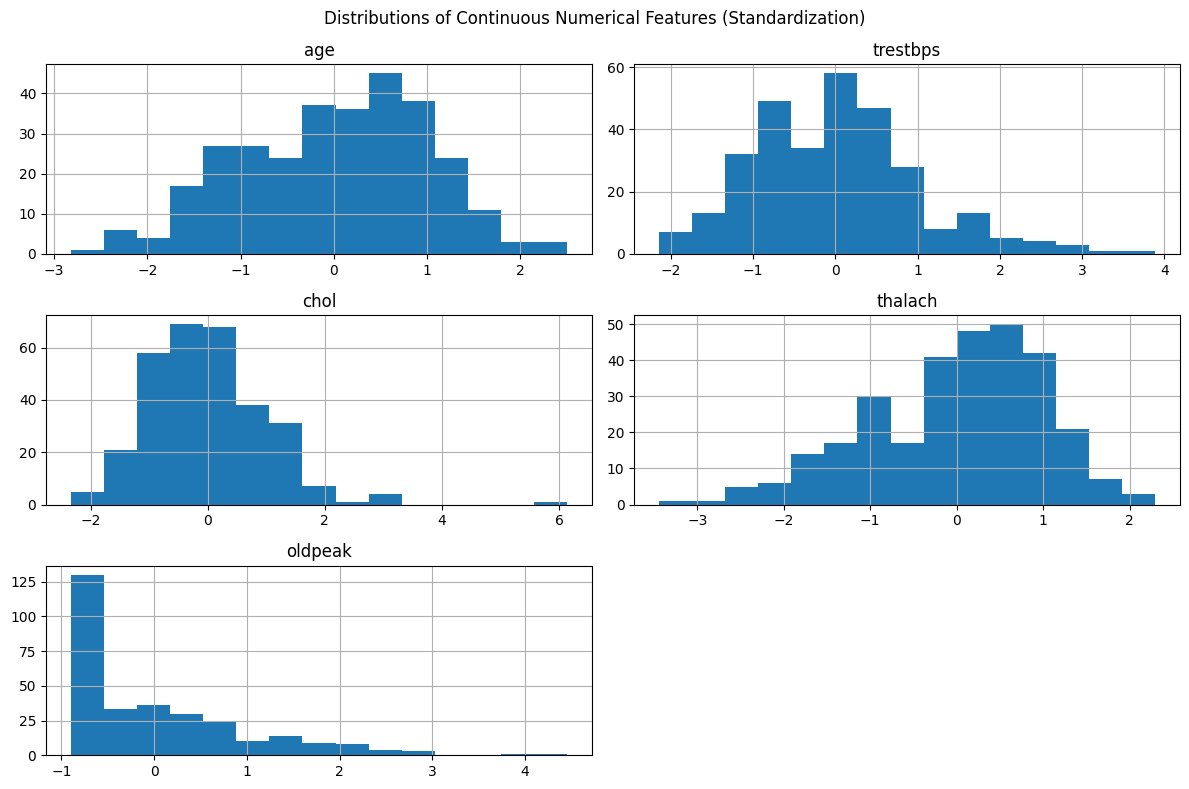

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Number of observations and features
print(f"Number of observations: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")

# Data types
print("\nData types:")
print(X.dtypes)

# Separate continuous numerical and categorical/discrete integer variables
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# 1. Dataset shape
print(f"Number of observations: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")

# 2. Data types
print("\nData types:")
print(X.dtypes)

# 3. Missing values per column
print("\nMissing values per column:")
print(X.isnull().sum())

# 4. Summary statistics for continuous numerical variables
print("\nSummary statistics for continuous numerical variables:")
print(X[numerical_features].describe())

# 5. Frequency tables for discrete/categorical variables
print("\nValue counts for categorical/discrete variables:")
for col in categorical_features:
    print(f"\n{col} value counts:")
    print(X[col].value_counts(dropna=False))

# Missing values per column
print("\nMissing values per column:")
print(X.isnull().sum())

# Distribution plots for a few variables
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X[numerical_features].hist(bins=15, figsize=(12, 8))
plt.suptitle("Distributions of Continuous Numerical Features (Standardization)")
plt.tight_layout()
plt.show()

The dataset consists of **303 observations** and **13 features**, representing patient medical information relevant to heart disease diagnosis. The features include both **continuous numerical variables** (e.g., `age`, `chol`, `thalach`) and **discrete or categorical variables** (e.g., `sex`, `cp`, `fbs`, `thal`).

**Data Types and Structure:**
- Continuous numerical variables: `age`, `trestbps`, `chol`, `thalach`, `oldpeak`
- Categorical/discrete variables: `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal`
- All features are stored as either `float64` or `int64` types
- Missing values are present in `ca` (4 cases) and `thal` (2 cases)

**Summary Statistics:**
- After standardization, all continuous numerical features have a mean close to 0 and standard deviation close to 1
- `age` ranges from approximately -2.82 to 2.50 (standardized units), corresponding to actual ages from 29 to 77
- `oldpeak` (ST depression) ranges from about -0.90 to 4.45 (standardized), indicating variation in exercise-induced abnormalities

**Distributions:**
- `sex` is imbalanced, with 206 males (1) and 97 females (0)
- Most patients do not have fasting blood sugar > 120 (`fbs=0`: 258 cases)
- Chest pain types (`cp`) are dominated by type 4 (144 cases), which likely corresponds to asymptomatic pain
- `ca` (number of major vessels) is skewed: most patients have 0 vessels colored (176), while very few have 3 (20)



Q4

In [61]:
# Make a copy of y to avoid modifying the original
y_binary = y.copy()

# Convert values: 0 → 0 (no heart disease), 1–4 → 1 (has heart disease)
y_binary['num'] = y_binary['num'].apply(lambda x: 1 if x > 0 else 0)

print(y_binary['num'].value_counts())


num
0    164
1    139
Name: count, dtype: int64


Q5

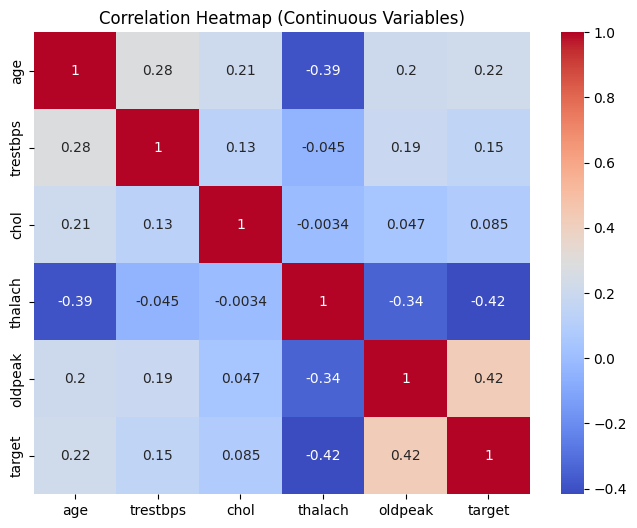

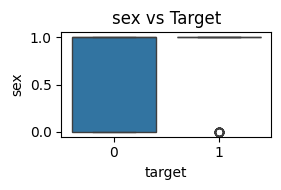

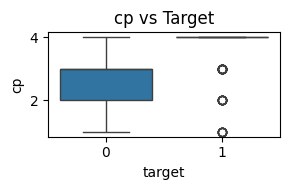

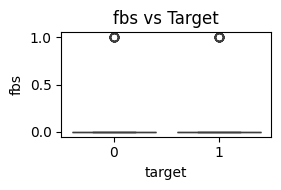

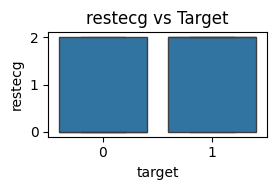

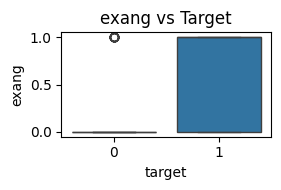

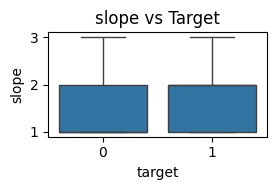

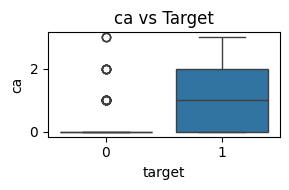

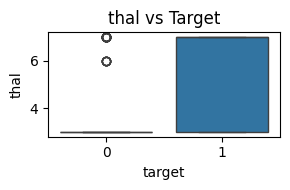

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Add the binary target to X temporarily for analysis
X_with_target = X.copy()
X_with_target['target'] = y_binary['num']

# 2. Correlation heatmap (only for continuous variables + target)
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
corr = X_with_target[continuous_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Continuous Variables)")
plt.show()

# 3. Boxplots for categorical variables vs target
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for col in categorical_features:
    plt.figure(figsize=(3, 2))
    sns.boxplot(x='target', y=col, data=X_with_target)
    plt.title(f"{col} vs Target")
    plt.tight_layout()
    plt.show()


To understand which features are most relevant for predicting heart disease, we analyzed both numerical correlations and categorical feature distributions.

**1. Correlation Analysis (Continuous Variables):**  
The correlation heatmap reveals two continuous features with meaningful relationships to the target:
- **`thalach` (maximum heart rate)** is negatively correlated with heart disease (`r = -0.42`), indicating that patients with lower peak heart rates tend to have heart disease.
- **`oldpeak` (ST depression)** shows a moderate positive correlation with heart disease (`r = 0.42`), meaning higher ST depression values are more common in affected patients.

These features are likely important predictors and should be retained in the model.

**2. Categorical Feature Insights:**  
- **`thal` (thalassemia type)** is a strong indicator: patients with abnormal values (`6`, `7`) are overwhelmingly in the heart disease group, while those with `thal = 3` (normal) are mostly healthy.
- **`exang` (exercise-induced angina)** shows a strong relationship with the target: most patients with `exang = 1` (positive angina) have heart disease.
- In contrast, features like **`fbs` (fasting blood sugar >120)** are heavily imbalanced and show little variation across classes, suggesting they may be less informative for classification.

These findings guide us to prioritize variables like `thal`, `exang`, `thalach`, and `oldpeak` in feature selection, while reconsidering low-variance or weakly correlated features like `fbs`.